# AS4PA Third set of exercises:

Gaudio Raffaele (2057974)

Delivery: 01/05/2022

In [2]:
#importing cell

library("ggplot2")
library("GoFKernel")
library("gridExtra")

Caricamento del pacchetto richiesto: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



### Exercise 1 

The triangualr distribution, in the intervall $(a,b)$, is given by the following:

$$
f(X)=
\begin{cases}
\frac{2(x-a)}{(b-a)(c-a)}       & a\leq x < c \\
\frac{2(b-x)}{(b-a)(c-a)}       & c\leq x \leq b \\
0 & otherwise
\end{cases}
$$

where $c\in [a,b]$.

a) Plot the function given the intervall $(a,b)$.

b) Write an algorithm to generate random numbers from the triangualr distribution.

c) generate $10^4$ random numbers from the distribution, show them in an histogram and superimpose the analytical curve.

Area: 1

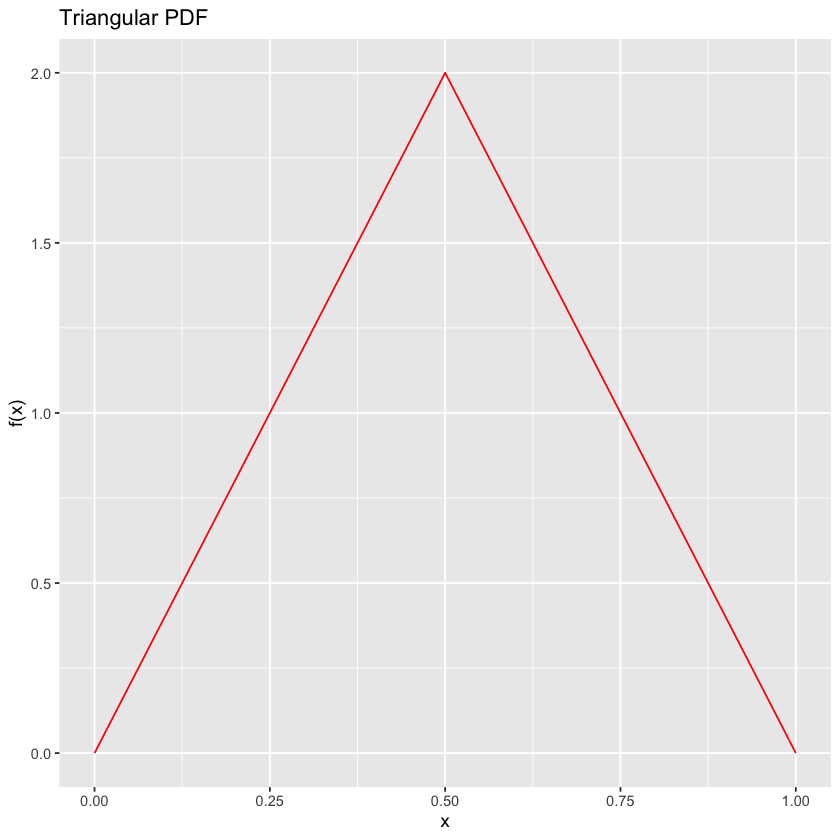

In [3]:
# a) Plot the function given the intervall (a,b).

d_f <- Vectorize( function(x,a=0,b=1,c=0.5){   
        if(x >= a & x<c){
            X <- 2*(x-a)/( (b-a)*(c-a) ) 
            return(X)
            }
    
        else if(x >=c & x <=b){
            X <- 2*(b-x)/( (b-a)*(b-c) ) 
            return(X)
            }
    
        else{return(0)
        }
    })

#verify that the PDF is normalized
cat("Area:",integrate(d_f,0,1)$value)

a <- 0
b <- 1
c <- 0.5

x <- seq(0,1,by=0.01)

ggplot()+
    geom_line(aes(x,d_f(x,a,b,c)),color="red")+
    labs(title="Triangular PDF",x="x",y="f(x)")

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


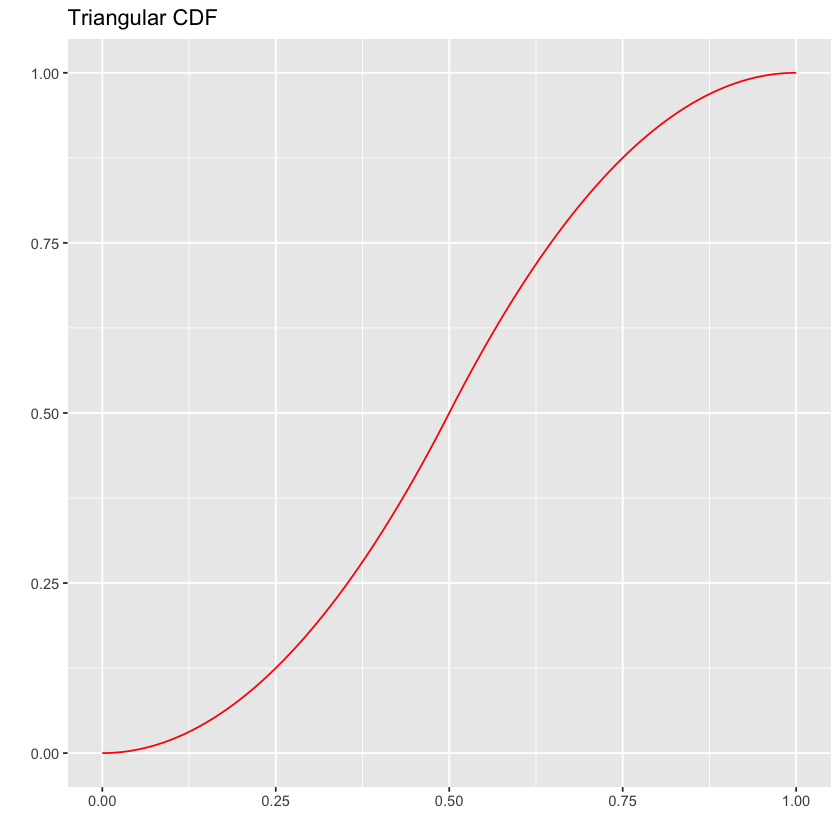

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


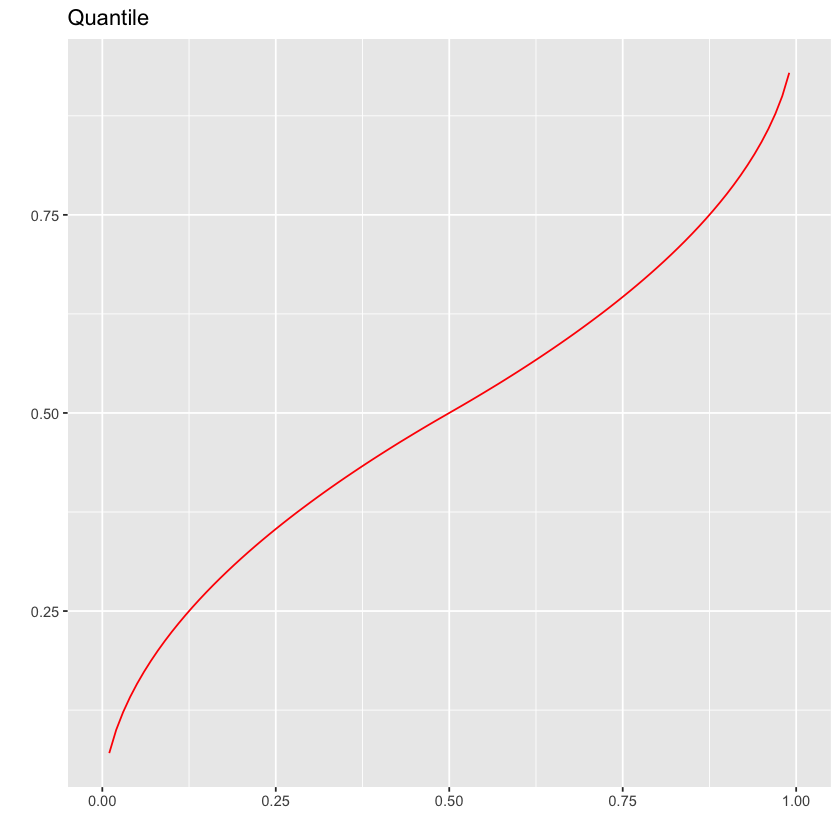

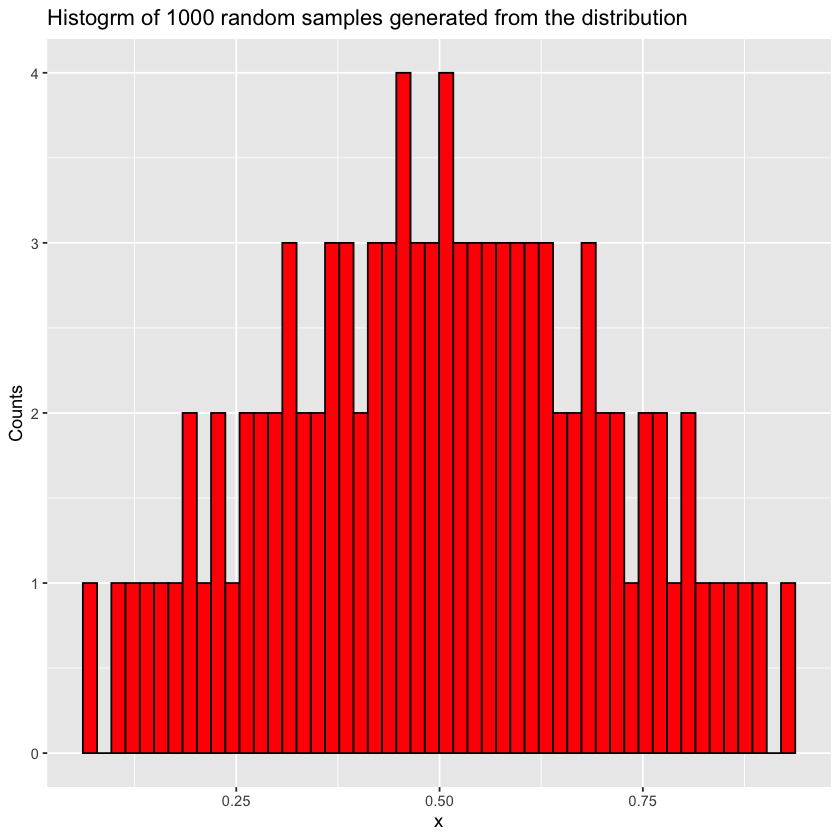

In [4]:
# b) Write an algorithm to generate random numbers from the triangualr distribution.

p_f<-Vectorize(function(x,a=0,b=1,c=0.5){
    if(x<a){
        X<-0
        return(X)
        }
    else if(x>=a & x<c){
        X<-integrate(d_f,lower=a, upper=x,a=a,b=b,c=c)$value
        return(X)
        }
    else if(x>=c & x<=b){
        X<-integrate(d_f,lower=c,upper=x,a=a,b=b,c=c)$value + integrate(d_f,lower=a, upper=c,a=a,b=b,c=c)$value
            return(X)
        }
    else if(x>b){
        X<-0
        return(X)
        }  
    })

q_f<-function(x){ 
    q_f_tmp <- Vectorize(inverse(p_f, lower = 0, upper = 1))
        ifelse((x>0 & x<1),
            q_f_tmp(x),
        NA)
}

r_f<-function(n){
    set.seed(1234)
    t <- runif(n)
    q_f(x)
}

ggplot()+
    geom_line(aes(x,p_f(x,a=a,b=b,c=c)),color="red")+
    labs(title="Triangular CDF",x="",y="")

ggplot()+
    geom_line(aes(x,q_f(x)),color="red")+
    labs(title="Quantile",x="",y="")

ggplot()+
    geom_histogram(aes(r_f(1000)), color="black",fill="red",bins=50)+
    labs(title="Histogrm of 1000 random samples generated from the distribution",x="x",y="Counts")



Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


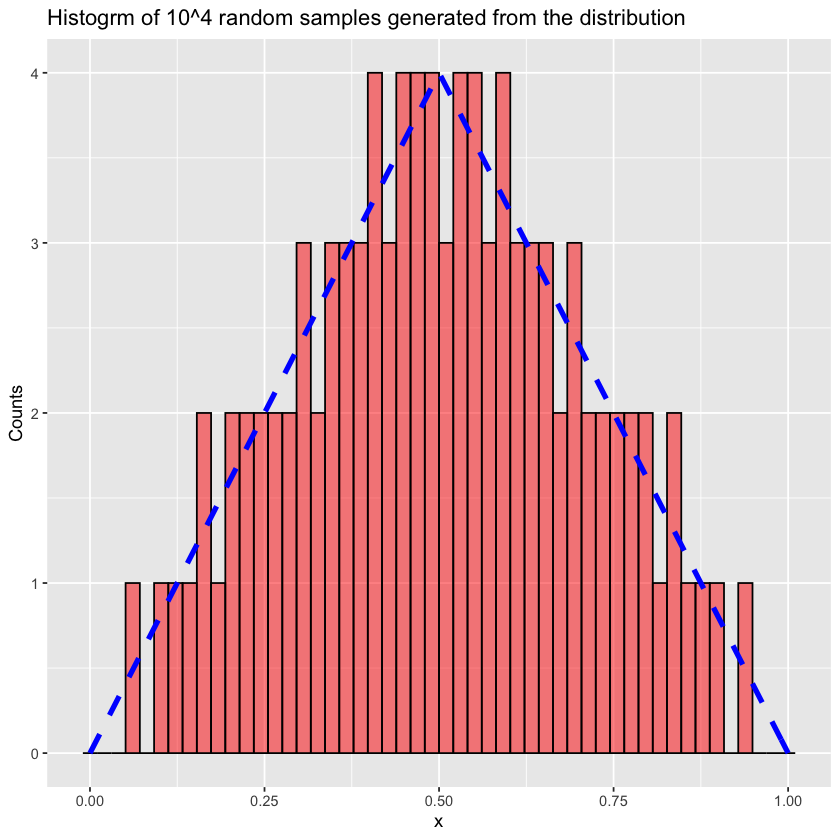

In [5]:
# c) generate 10^4 random numbers from the distribution, show them in an histogram and superimpose the analytical curve.

ggplot()+
    geom_histogram(aes(r_f(10^4)), color="black",fill="red",bins=50,alpha=0.5)+
    geom_line(aes(x,2*d_f(x,a=a,b=b,c=c)),color="blue",size=1.5,linetype = "dashed")+
    labs(title="Histogrm of 10^4 random samples generated from the distribution",x="x",y="Counts")

### Exercise 2: Markov's inequality

Markov's inequality represents an upper bound to probability distributions:

$$
P(X \geq k) \leq \frac{E[X]}{k}
$$

for $k>0$.

Having defined a function

$$
G(k)= 1-F(k) \equiv P(X \leq k)
$$

plot $G(x)$ and Markov's upper bound for:

a) the exponential $Exp(\lambda=1)$ distribution function,

b) the uniform $U(3,5)$ distribution function,

c) the binomial $Bin(n=1,p=1/2)$ distribution function,

d) a Poisson $Pois(\lambda=1/2)$ distribution function.

Warning message:
“Removed 19 row(s) containing missing values (geom_path).”


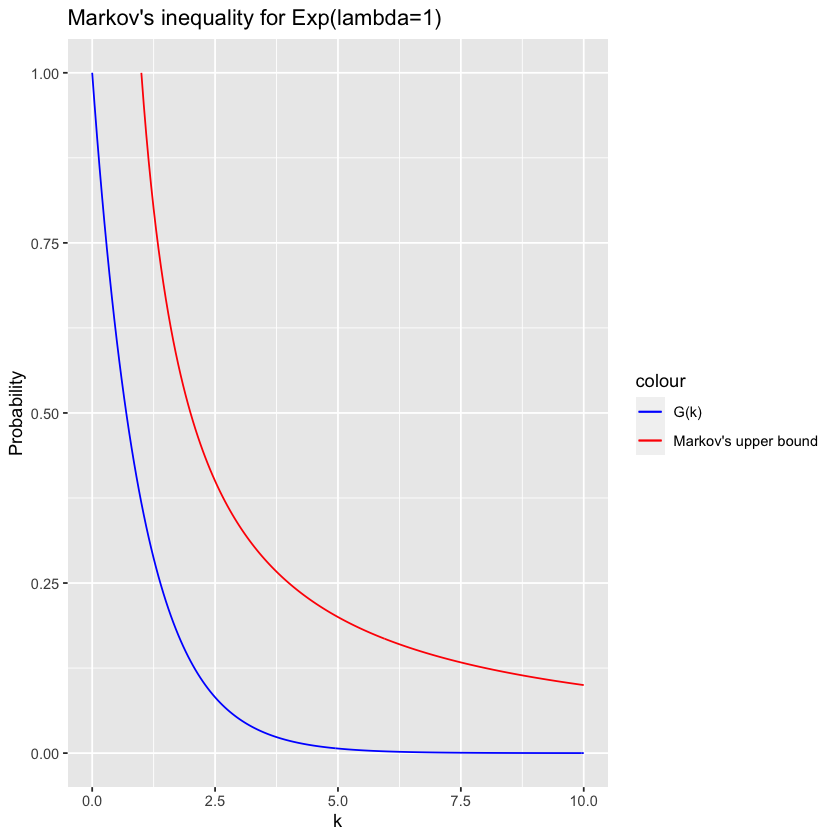

In [6]:
# exponential Exp(lambda=1) distribution function

x<-seq(0,10,0.05)

lambda=1

G<-1-pexp(x,lambda)
E<-1/lambda

x_bound<-x[-1] #i exlude the first value
upper_bound<-E/x_bound

ggplot()+
    geom_line(aes(x,G,colour="blue"))+
    geom_line(aes(x_bound,upper_bound,color="red"))+
    ylim(0,1)+
    scale_colour_manual(values=c("blue","red"),labels=c("G(k)","Markov's upper bound"))+
    labs(title="Markov's inequality for Exp(lambda=1)",x="k",y="Probability")



Warning message:
“Removed 79 row(s) containing missing values (geom_path).”


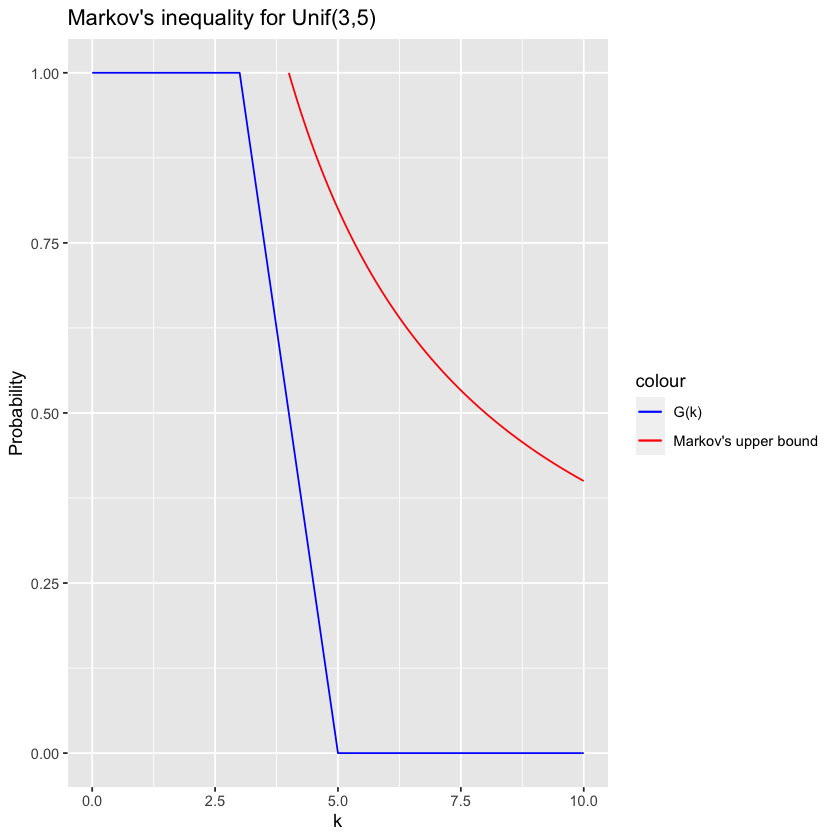

In [7]:
# uniform U(3,5) distribution function

a<-3
b<-5

G<-1-punif(x,a,b)
E<-(a+b)/2

x_bound<-x[-1] 
upper_bound<-E/x_bound

ggplot()+
    geom_line(aes(x,G,colour="blue"))+
    geom_line(aes(x_bound,upper_bound,color="red"))+
    ylim(0,1)+
    scale_colour_manual(values=c("blue","red"),labels=c("G(k)","Markov's upper bound"))+
    labs(title="Markov's inequality for Unif(3,5)",x="k",y="Probability")


Warning message:
“Removed 9 row(s) containing missing values (geom_path).”


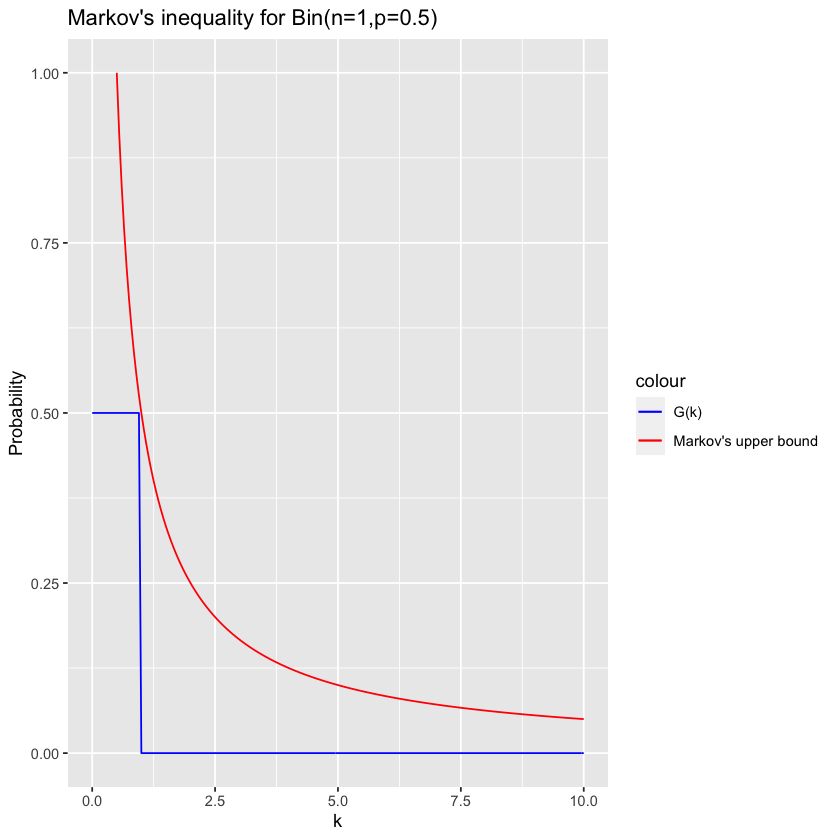

In [8]:
# binomial Bin(n=1,p=1/2) distribution function

n<-1
p<-0.5

G<-1-pbinom(x,n,p)
E<-n*p

x_bound<-x[-1] 
upper_bound<-E/x_bound

ggplot()+
    geom_line(aes(x,G,colour="blue"))+
    geom_line(aes(x_bound,upper_bound,color="red"))+
    ylim(0,1)+
    scale_colour_manual(values=c("blue","red"),labels=c("G(k)","Markov's upper bound"))+
    labs(title="Markov's inequality for Bin(n=1,p=0.5)",x="k",y="Probability")


Warning message:
“Removed 9 row(s) containing missing values (geom_path).”


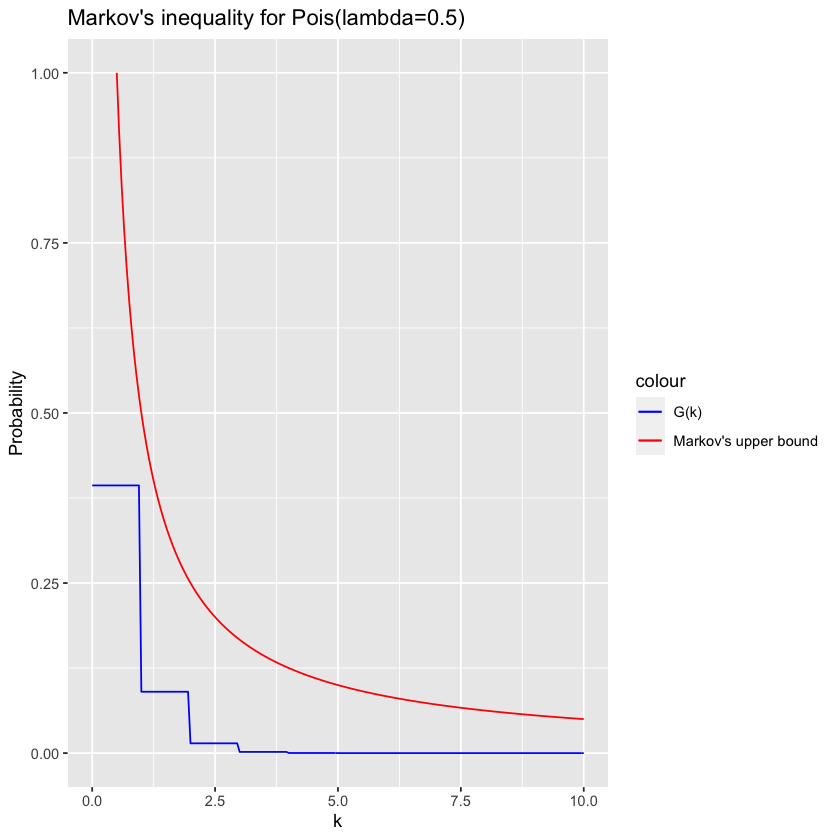

In [9]:
# Poisson Pois(lambda=1/2) distribution function

lambda=0.5

G<-1-ppois(x,lambda)
E<-lambda

x_bound<-x[-1] 
upper_bound<-E/x_bound

ggplot()+
    geom_line(aes(x,G,colour="blue"))+
    geom_line(aes(x_bound,upper_bound,color="red"))+
    ylim(0,1)+
    scale_colour_manual(values=c("blue","red"),labels=c("G(k)","Markov's upper bound"))+
    labs(title="Markov's inequality for Pois(lambda=0.5)",x="k",y="Probability")


### Exercise 3: Chebyshev's inequality

Chebyshev’s inequality tell us that

$$
P(|X-\mu|\geq k\sigma)\leq\frac{1}{k^2}
$$

which can also be written as

$$
P(|X-\mu|< k\sigma)\geq 1-\frac{1}{k^2}
$$

use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the following distributions:

a) a normal distribution, $N(\mu = 3, \sigma = 5)$

b) an exponential distribution $Exp(\lambda=1)$

c) a uniform distribution $U(1-\sqrt{2},1+\sqrt{2})$ 

d) a Poisson, $Pois(\lambda=1/3)$, distribution function





Warning message:
“Removed 19 row(s) containing missing values (geom_path).”


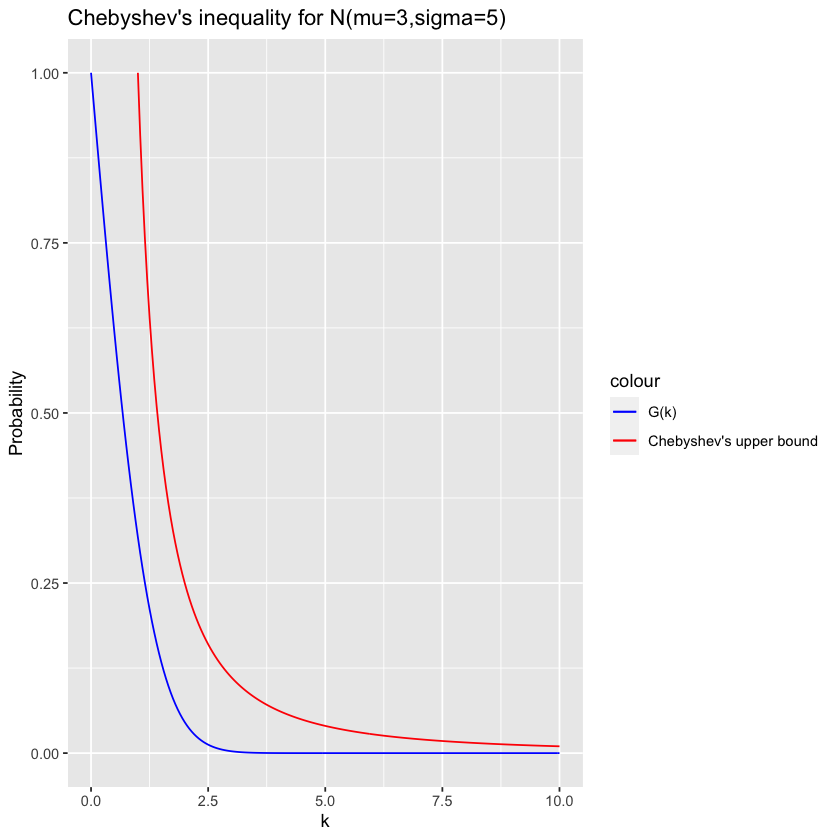

In [10]:
# normal distrubution N(mu=3,sigma=5)

x<-seq(0,10,0.05)

mu<-3
sigma<-5

G<-1-pnorm((x*sigma+mu),mean=mu,sd=sigma)+pnorm((-x*sigma+mu),mean=mu,sd=sigma)

x_bound<-x[-1] 
upper_bound<-1/x_bound^2

ggplot()+
    geom_line(aes(x,G,colour="blue"))+
    geom_line(aes(x_bound,upper_bound,color="red"))+
    ylim(0,1)+
    scale_colour_manual(values=c("blue","red"),labels=c("G(k)","Chebyshev's upper bound"))+
    labs(title="Chebyshev's inequality for N(mu=3,sigma=5)",x="k",y="Probability")


Warning message:
“Removed 19 row(s) containing missing values (geom_path).”


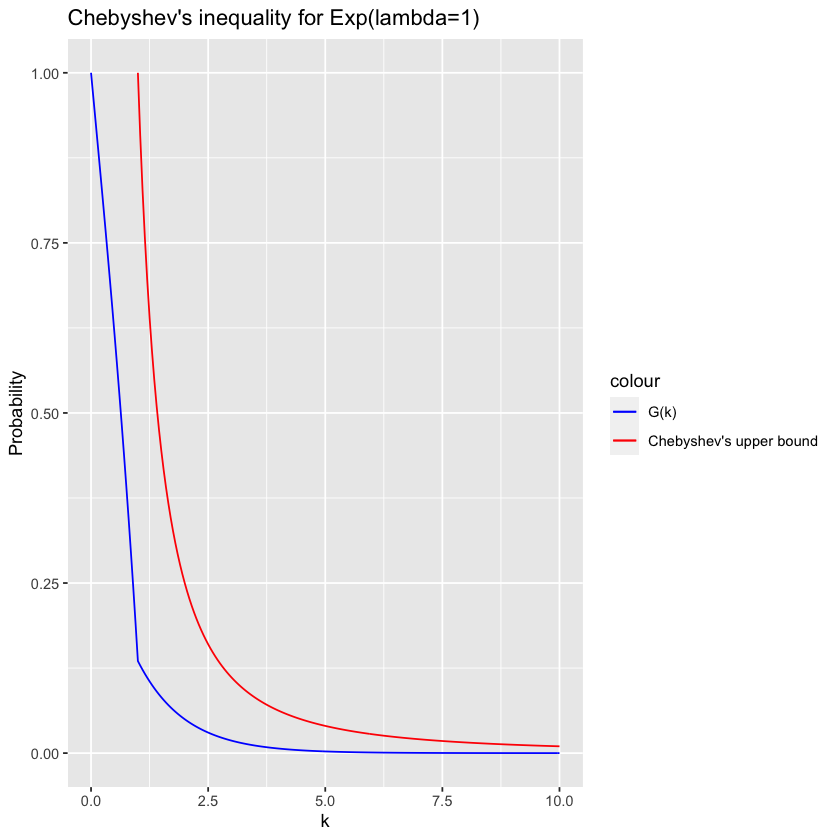

In [11]:
# esponetial distribution Exp(lambda=1)

lambda<-1
mu<-1/lambda 
sigma<-1/lambda


G<-1-pexp(x*sigma+mu,lambda)+pexp(-x*sigma+mu,lambda)

x_bound<-x[-1] 
upper_bound<-1/x_bound^2

ggplot()+
    geom_line(aes(x,G,colour="blue"))+
    geom_line(aes(x_bound,upper_bound,color="red"))+
    ylim(0,1)+
    scale_colour_manual(values=c("blue","red"),labels=c("G(k)","Chebyshev's upper bound"))+
    labs(title="Chebyshev's inequality for Exp(lambda=1)",x="k",y="Probability")


Warning message:
“Removed 19 row(s) containing missing values (geom_path).”


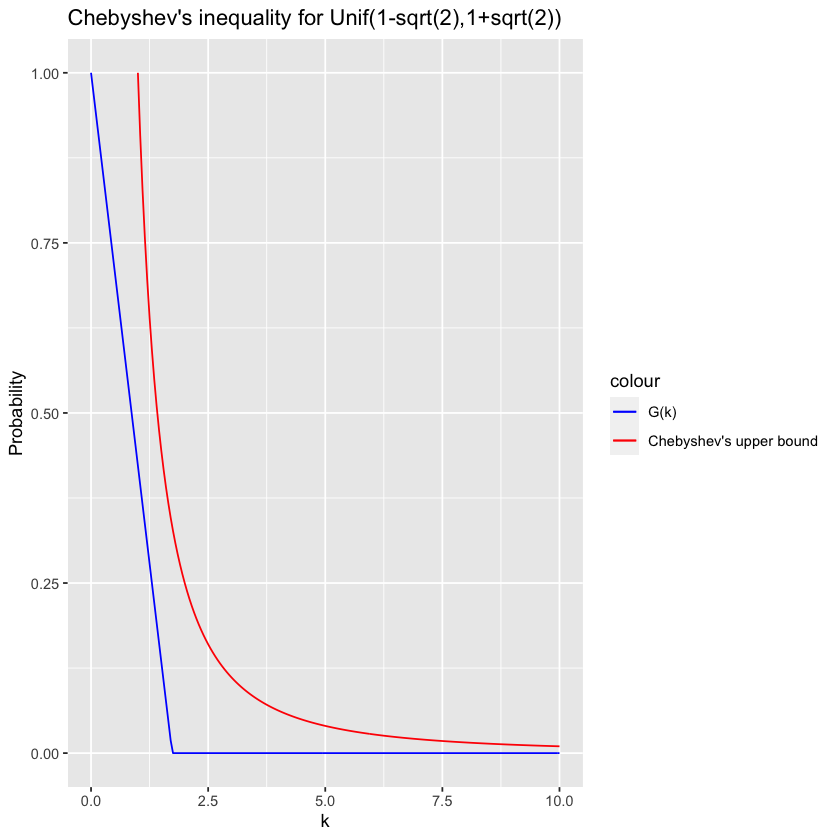

In [12]:
# uniform distribution U(1-sqrt(2),1+sqrt(2))

a<-1-sqrt(2)
b<-1+sqrt(2)
mu<-(a+b)/2
sigma<-(b-a)/sqrt(12)

G<-1-punif(x*sigma+mu,a,b)+punif(-x*sigma+mu,a,b)

x_bound<-x[-1] 
upper_bound<-1/x_bound^2

ggplot()+
    geom_line(aes(x,G,colour="blue"))+
    geom_line(aes(x_bound,upper_bound,color="red"))+
    ylim(0,1)+
    scale_colour_manual(values=c("blue","red"),labels=c("G(k)","Chebyshev's upper bound"))+
    labs(title="Chebyshev's inequality for Unif(1-sqrt(2),1+sqrt(2))",x="k",y="Probability")

Warning message:
“Removed 19 row(s) containing missing values (geom_path).”


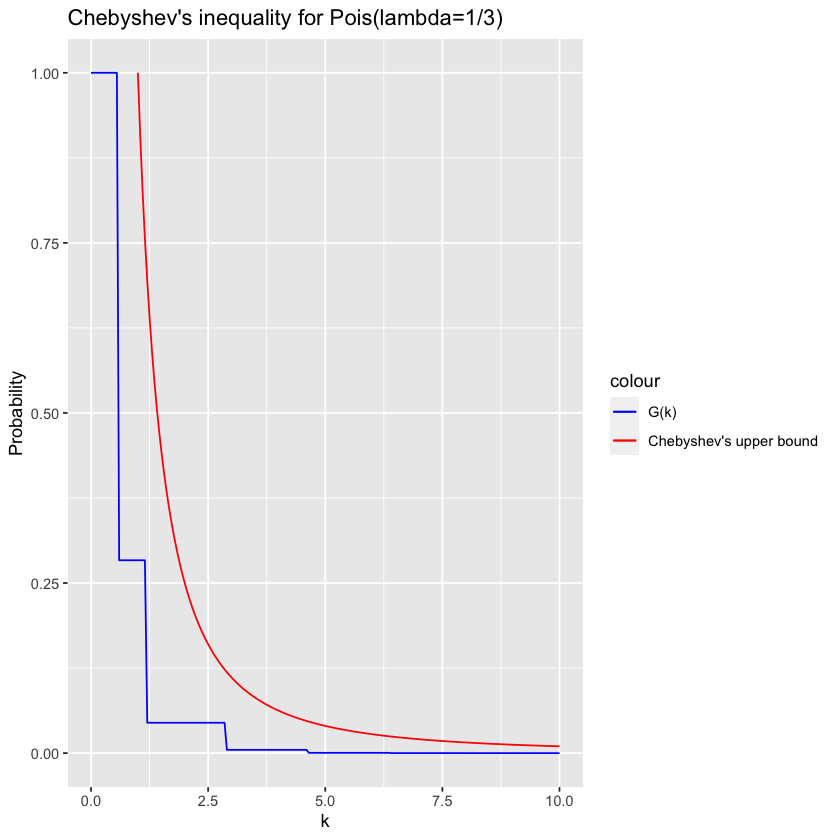

In [13]:
# poisson distribution Pois(lambda=1/3)

lambda<-1/3
mu<-lambda
sigma<-sqrt(lambda)

G<-1-ppois(x*sigma+mu,lambda)+ppois(-x*sigma+mu,lambda)

x_bound<-x[-1] 
upper_bound<-1/x_bound^2

ggplot()+
    geom_line(aes(x,G,colour="blue"))+
    geom_line(aes(x_bound,upper_bound,color="red"))+
    ylim(0,1)+
    scale_colour_manual(values=c("blue","red"),labels=c("G(k)","Chebyshev's upper bound"))+
    labs(title="Chebyshev's inequality for Pois(lambda=1/3)",x="k",y="Probability")

### Exercise 4 - Six Boxes Toy Model : inference

The six boxes toy model is described in reference [1].

Labeling the boxes as follows:

<img src="fig1.png">

Write a program in R that:

a) allows the user to insert the color of a randomly extracted box and 

b) prints on the standard output the probability of selecting each box

c) plots the probability for each box as a function of the extraction step

In [14]:
#first approach to the problem: after "n" extraction we count how many "x" white stones we get and we compute the final
#probability for each box.

#the function returns an "old school" layout with the results 

six_box_results<-function(n,x){
    N<-5
    i<-0:N 
    pii<-i/N 
    
    prob_H<-pii^x *(1-pii)^(n-x)/sum(pii^x *(1-pii)^(n-x)) 

    return(
        cat("----------------------------\nNUMBER OF TRIALS:", n, "\n----------------------------\nWHITE STONE EXTRACTED:",x, "\nBLACK STONE EXTRACTED:",n-x, "\n----------------------------\nProb H0:", prob_H[1],"\nProb H1:", prob_H[2],"\nProb H2:", prob_H[3],"\nProb H3:", prob_H[4],"\nProb H4:", prob_H[5],"\nProb H5:", prob_H[6],"\n----------------------------\n")   
    )
}

In [15]:
six_box_results(20,3)

----------------------------
NUMBER OF TRIALS: 20 
----------------------------
WHITE STONE EXTRACTED: 3 
BLACK STONE EXTRACTED: 17 
----------------------------
Prob H0: 0 
Prob H1: 0.9430923 
Prob H2: 0.0567134 
Prob H3: 0.000194271 
Prob H4: 3.513293e-09 
Prob H5: 0 
----------------------------


In [16]:
#second approach: a function that accepts a list of extractions and produces the propabaility plot for each box

# 0 is black
# 1 si white

updating_rule<-function(prob_H_i, color){ 
    N <- length(prob_H_i) -1
    p_w_i <- 0:N/N 
    p_b_i <- 1 - p_w_i

    if (color == 0){                              
        x <- p_b_i * prob_H_i
        prob_H_i_next <- x/sum(x) 
        p_w_next <- p_w_i %*% prob_H_i_next  
        return(c(prob_H_i_next,p_w_next))
    }
    else if (color == 1){                         
        x <- p_w_i * prob_H_i
        prob_H_i_next <- x/sum(x) 
        p_w_next <- p_w_i %*% prob_H_i_next  
        return(c(prob_H_i_next,p_w_next))
    }
}

six_box_toy <- function(data){
    prob_H_0<-c(1,1,1,1,1,1)/6 #prob at trial 0

    N <- length(data)
    df <- data.frame(matrix(NA,nrow = N,ncol = 8))
    colnames(df) <- c("Colour","prob_H0","prob_H1","prob_H2","prob_H3","prob_H4","prob_H5","prob_EW")
    df[1,2:7] <- prob_H_0
    df[1,8] <- 0.5

    for (i in 1:N+1){
        df[i,1] <- data[i-1] 
        update <- updating_rule(prob_H_0,data[i-1]) 
        prob_H_0 <- update[1:6]      
        df[i,2:7] <- update[1:6] 
        df[i,8] <- update[7]
    }

    df$Colour[df$Colour == 0] <- "B" 
    df$Colour[df$Colour == 1] <- "W" 
    df$Trial <- 1:(N+1)

    fig1<-ggplot(df)+
        geom_point(aes(Trial,prob_H0),color="blue")+
        ylim(0,1)+
        labs(title="H0",x="Trial",y="Probability")

    fig2<-ggplot(df)+
            geom_point(aes(Trial,prob_H1),color="blue")+
            ylim(0,1)+
            labs(title="H1",x="Trial",y="Probability")

    fig3<-ggplot(df)+
            geom_point(aes(Trial,prob_H2),color="blue")+
            ylim(0,1)+
            labs(title="H2",x="Trial",y="Probability")

    fig4<-ggplot(df)+
            geom_point(aes(Trial,prob_H3),color="blue")+
            ylim(0,1)+
            labs(title="H3",x="Trial",y="Probability")

    fig5<-ggplot(df)+
            geom_point(aes(Trial,prob_H4),color="blue")+
            ylim(0,1)+
            labs(title="H4",x="Trial",y="Probability")

    fig6<-ggplot(df)+
            geom_point(aes(Trial,prob_H5),color="blue")+
            ylim(0,1)+
            labs(title="H5",x="Trial",y="Probability")

    return(grid.arrange(fig1,fig2,fig3,fig4,fig5,fig6,nrow=2,ncol=3))
}

----------------------------
NUMBER OF TRIALS: 20 
----------------------------
WHITE STONE EXTRACTED: 3 
BLACK STONE EXTRACTED: 17 
----------------------------
Prob H0: 0 
Prob H1: 0.9430923 
Prob H2: 0.0567134 
Prob H3: 0.000194271 
Prob H4: 3.513293e-09 
Prob H5: 0 
----------------------------


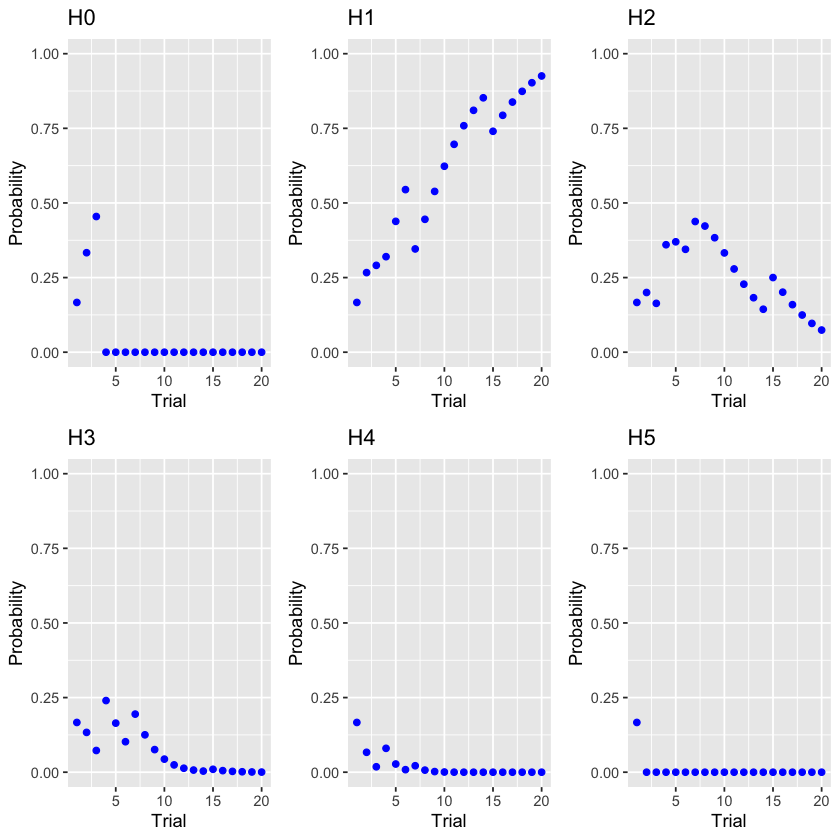

In [17]:
extraction <- c(0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0)

six_box_toy((extraction))
six_box_results(20,3)


### Exercise 5 - Six Boxes Toy Model : simulation

consider again the six boxes toy model of the previous exercise and write a simulation program that:

a) selects a random box

b) makes random sampling from the box

c) prints on the standard output the probability of selecting each box

d) plots the probability for each box as a function of the number of trial

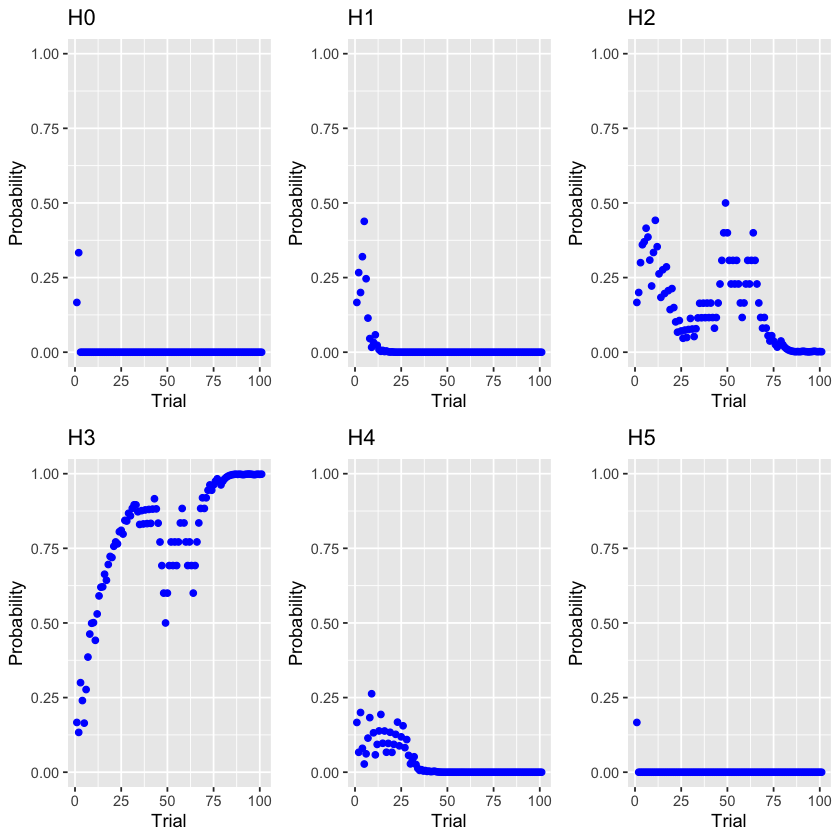

In [20]:
n<-100 

box<-seq(0,1,0.1)
select_box<-sample(box,1)
simulation<-rbinom(n,1,select_box)

six_box_toy(simulation)
